5717


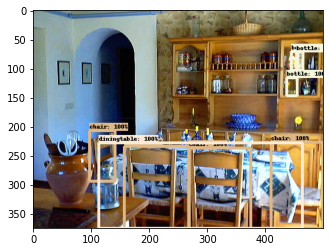

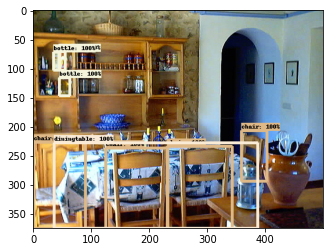

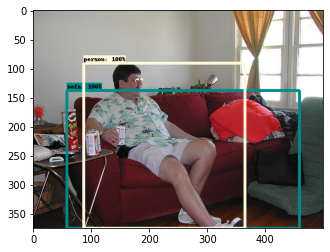

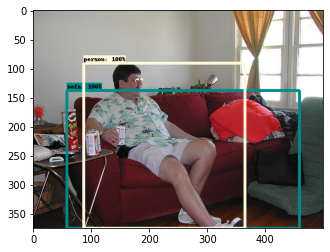

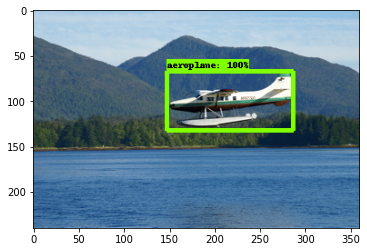

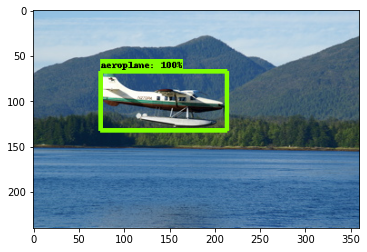

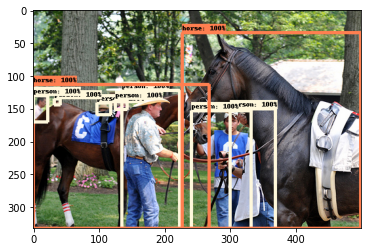

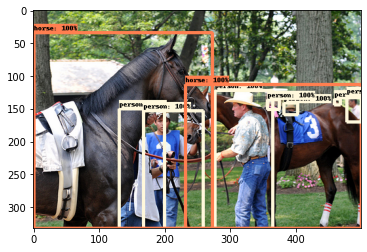

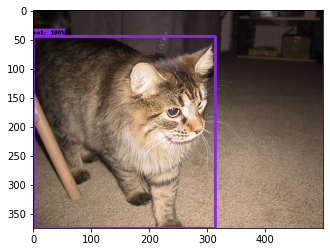

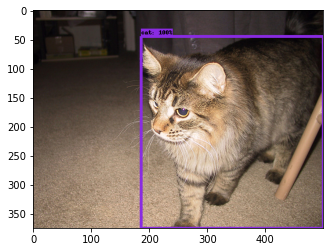

In [9]:
import transforms
import os
from draw_box_utils import draw_box
from PIL import Image
import json
import matplotlib.pyplot as plt
import torchvision.transforms as ts
import random
from dataset import VOCDataset

# read class_indict
category_index = {}
try:
    json_file = open('./pascal_voc_classes.json', 'r')
    class_dict = json.load(json_file)
    category_index = {v: k for k, v in class_dict.items()}
except Exception as e:
    print(e)
    exit(-1)

data_transform = {
    "train": transforms.Compose([transforms.ToTensor(),
                                 transforms.RandomHorizontalFlip(0.5)]),
    "val": transforms.Compose([transforms.ToTensor()])
}

# load train data set
train_data_set = VOCDataset(os.getcwd(), "VOC2012", data_transform["train"], "train.txt")
origin_train_data_set = VOCDataset(os.getcwd(), "VOC2012", data_transform["val"],txt_name= "train.txt")
print(len(train_data_set))
for index in random.sample(range(0, len(train_data_set)), k=5):
    img, target = train_data_set[index]
    oimg,otarget = origin_train_data_set[index]
    img = ts.ToPILImage()(img)
    oimg = ts.ToPILImage()(oimg)
    draw_box(img,
             target["bboxes"].numpy(),
             target["labels"].numpy(),
             [1 for i in range(len(target["labels"].numpy()))],
             category_index,
             thresh=0.5,
             line_thickness=5)
    plt.imshow(img)
    plt.show() 
    draw_box(oimg,
             otarget["bboxes"].numpy(),
             otarget["labels"].numpy(),
             [1 for i in range(len(otarget["labels"].numpy()))],
             category_index,
             thresh=0.5,
             line_thickness=5)
    plt.imshow(oimg)
    plt.show()        